In [1]:
from textblob import TextBlob

In [2]:
Feedback1 = "KamalaHarris Yeah for the worse We need a productive President one who stands for us all The ONLY MAN FOR THE JOB IS DONALD J TRUMP TRUMP 2020 TRUMP JR 2024"
Feedback2 = "realDonaldTrump The 2020 election is a matter of life and death. So vote like your life depends on it BidenHarris2020 "
Feedback3 = "realDonaldTrump Hell no VoteBlueToEndThisNightmare VoteBidenHarris2020 VoteBidenHarrisToSaveAmerica"
Feedback4 = "Contrary to what the pundits in the mainstream media would have you believe, President Donald Trump obliterated Joe Biden in the presidential debate on Tuesday night, and it really was not even close."
Feedback5 = "Donald Trump is amazing.  He is the greatest president ever, Joe Biden is a racist, downright stupid, ignorant human being."

blob1 = TextBlob(Feedback1)
blob2 = TextBlob(Feedback2)
blob3 = TextBlob(Feedback3)
blob4 = TextBlob(Feedback4)
blob5 = TextBlob(Feedback5)

print(blob1.sentiment)
print(blob2.sentiment)
print(blob3.sentiment)
print(blob4.sentiment)
print(blob5.sentiment)

Sentiment(polarity=-0.2, subjectivity=0.8)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.20000000000000004, subjectivity=0.75)


In [3]:
import nltk
import string
import pandas as pd

from collections import Counter
import matplotlib.pyplot as plt

In [4]:
file="hillary3_2016_test.csv"
hillary3_df=pd.read_csv(file)
hillary3_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,7.957780e+17,7.957730e+17,2016-11-07 18:59:59 Eastern Standard Time,42681,0.791655,-400,6.463613e+07,evahopkins,Eva Devi Hopkins #BLM,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '18852713', 'username': 'Sherry09'}",NaN,NaN,NaN,NaN
1,7.957780e+17,7.957780e+17,2016-11-07 18:59:59 Eastern Standard Time,42681,0.791655,-400,1.955150e+07,nevadamedia,Nevada Media,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
2,7.957780e+17,7.957780e+17,2016-11-07 18:59:59 Eastern Standard Time,42681,0.791655,-400,3.523816e+09,coachmosleyva,Mike Mosley,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
3,7.957780e+17,7.957780e+17,2016-11-07 18:59:59 Eastern Standard Time,42681,0.791655,-400,1.920106e+08,gurlswithcurls,Kimberly C,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '1339835893', 'username': 'Hillary...",NaN,NaN,NaN,NaN
4,7.957780e+17,7.957770e+17,2016-11-07 18:59:59 Eastern Standard Time,42681,0.791655,-400,3.798781e+08,carder33,Polo Pauly,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '363862282', 'username': 'JeanKink...",NaN,NaN,NaN,NaN


In [5]:
df=pd.DataFrame(hillary3_df, columns=['tweet'])
df.head()

,tweet
0,@Sherry09 @politico @HillaryClinton Why don't ...
1,Snapchat Lens Makes People Look Like Hillary C...
2,"Also on the eve of the election, it is time fo..."
3,@HillaryClinton @POTUS @billclinton @FBI @real...
4,@JeanKinkade @realDonaldTrump @HillaryClinton ...


In [6]:
import re
def cleantweet(text):
    text=re.sub(r'@[A-Za-z0-9]+', '', text) # This removes @ mentions
    text=re.sub(r'#', '', text) # This removes the hashtag synbols
    text=re.sub(r'https?:\/\/\S+', '', text) # This removes the hyperlink
    
    return text

df['tweet']=df['tweet'].apply(cleantweet)
df.head()

,tweet
0,"Why don't you link me to that figure, pleas..."
1,Snapchat Lens Makes People Look Like Hillary C...
2,"Also on the eve of the election, it is time fo..."
3,
4,"they are both bad, but legally, she shouldn..."


In [7]:
# Create function to obtain subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create function to obtain polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create Columns for Subjectivity and Polarity
df['Subjectivity']=df['tweet'].apply(getSubjectivity)
df['Polarity']=df['tweet'].apply(getPolarity)
df.head()

,tweet,Subjectivity,Polarity
0,"Why don't you link me to that figure, pleas...",1.000000,0.000
1,Snapchat Lens Makes People Look Like Hillary C...,0.000000,0.000
2,"Also on the eve of the election, it is time fo...",0.000000,0.000
3,,0.000000,0.000
4,"they are both bad, but legally, she shouldn...",0.433333,-0.225


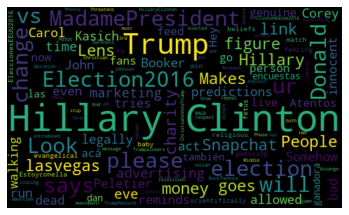

In [8]:
# Plotting a word cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allWords= ' '.join([twts for twts in df['tweet']])
wordCloud=WordCloud(width=500, height=300, random_state=21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
# Obtaining Polarity Analysis
def getPolarityAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Sentiment']=df['Polarity'].apply(getPolarityAnalysis)
df.head()

,tweet,Subjectivity,Polarity,Sentiment
0,"Why don't you link me to that figure, pleas...",1.000000,0.000,Neutral
1,Snapchat Lens Makes People Look Like Hillary C...,0.000000,0.000,Neutral
2,"Also on the eve of the election, it is time fo...",0.000000,0.000,Neutral
3,,0.000000,0.000,Neutral
4,"they are both bad, but legally, she shouldn...",0.433333,-0.225,Negative


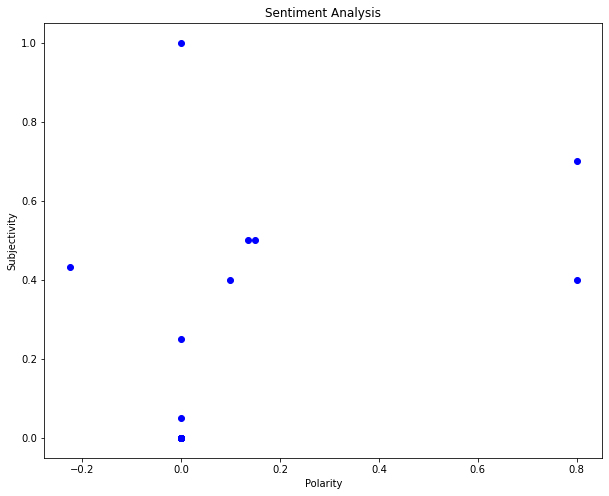

In [14]:
# Plotting polarity and subjectivity
plt.figure(figsize=(10,8))
plt.scatter(df['Polarity'], df['Subjectivity'], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.savefig('Final-Project/Images/sentiment_test.png')
plt.show()